<a href="https://colab.research.google.com/github/Matheusbcy/-Data-Science-IA-/blob/main/Calculo_do_risco_das_a%C3%A7%C3%B5es2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [29]:
dataset = pd.read_csv("acoes_ex.csv")
dataset

,Date,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
0,2015-01-02,16.020000,9.37,37.820000,9.000000,22.650000,47.259998
1,2015-01-05,15.730000,9.62,37.070000,8.270000,22.180000,46.320000
2,2015-01-06,16.330000,9.55,36.150002,8.060000,22.490000,46.580002
3,2015-01-07,16.559999,9.69,37.389999,8.450000,23.480000,48.150002
4,2015-01-08,16.540001,9.66,38.910000,9.020000,23.559999,48.509998
...,...,...,...,...,...,...,...
1441,2020-10-27,13.720000,14.00,43.480000,19.860001,32.779999,95.800003
1442,2020-10-28,13.370000,12.97,42.610001,18.639999,31.139999,92.430000
1443,2020-10-29,12.890000,12.84,42.250000,19.330000,30.959999,92.910004
1444,2020-10-30,12.180000,12.61,42.669998,19.000000,29.799999,90.660004


In [30]:
dataset.describe()

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,18.147683,13.361024,40.618340,19.018575,32.177282,71.770546
std,2.428168,2.338000,5.227046,7.507914,11.002951,19.913638
min,11.030000,9.000000,28.980000,5.910000,12.700000,36.450001
25%,17.260000,11.300000,36.692499,13.407500,23.420000,53.742500
50%,18.520000,13.195000,40.639999,17.380000,30.900000,71.090000
75%,19.357501,15.477500,43.917499,24.487500,40.315000,90.647503
max,24.270000,18.430000,56.740002,33.450001,55.180000,115.209999


In [31]:
dataset.drop(labels = ["Date"], axis = 1, inplace = True)

In [32]:
taxas_retorno = (dataset / dataset.shift(1)) - 1
taxas_retorno

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.018102,0.026681,-0.019831,-0.081111,-0.020751,-0.019890
2,0.038144,-0.007276,-0.024818,-0.025393,0.013977,0.005613
3,0.014084,0.014660,0.034301,0.048387,0.044020,0.033705
4,-0.001208,-0.003096,0.040653,0.067456,0.003407,0.007477
...,...,...,...,...,...,...
1441,-0.033803,0.031688,-0.019174,-0.016832,-0.021493,-0.010024
1442,-0.025510,-0.073571,-0.020009,-0.061430,-0.050030,-0.035177
1443,-0.035901,-0.010023,-0.008449,0.037017,-0.005780,0.005193
1444,-0.055081,-0.017913,0.009941,-0.017072,-0.037468,-0.024217


In [33]:
taxas_retorno.std() * 100

,0
AMBEV,1.723907
ODONTOPREV,1.998664
VIVO,2.036434
PETROBRAS,3.387036
BBRASIL,2.997884
BOVA,1.730221


In [34]:
taxas_retorno.std() * 246

,0
AMBEV,4.240810
ODONTOPREV,4.916713
VIVO,5.009627
PETROBRAS,8.332107
BBRASIL,7.374794
BOVA,4.256343


In [35]:
taxas_retorno.std() * math.sqrt(246)

,0
AMBEV,0.270384
ODONTOPREV,0.313478
VIVO,0.319402
PETROBRAS,0.531236
BBRASIL,0.470200
BOVA,0.271375


In [36]:
taxas_retorno.cov()

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
AMBEV,0.000297,0.000079,0.000110,0.000225,0.000214,0.000176
ODONTOPREV,0.000079,0.000399,0.000095,0.000195,0.000184,0.000136
VIVO,0.000110,0.000095,0.000415,0.000248,0.000221,0.000158
PETROBRAS,0.000225,0.000195,0.000248,0.001147,0.000633,0.000453
BBRASIL,0.000214,0.000184,0.000221,0.000633,0.000899,0.000412
BOVA,0.000176,0.000136,0.000158,0.000453,0.000412,0.000299


<Axes: >

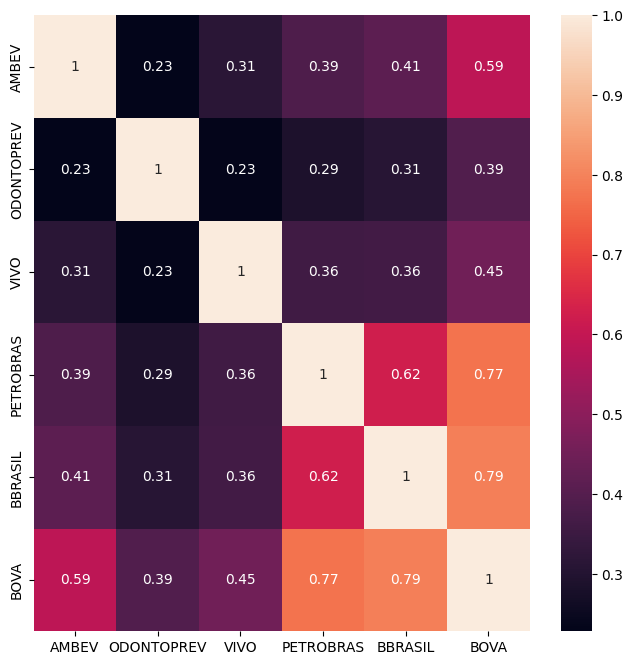

In [38]:
plt.figure(figsize = (8, 8))
sns.heatmap(taxas_retorno.corr(), annot = True)

In [39]:
pesos1 = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0])
variancia_portfolio1 = np.dot(pesos1, np.dot(taxas_retorno.cov() * 246, pesos1))
variancia_portfolio1

np.float64(0.07442895380850378)

In [40]:
desvio_padrao = math.sqrt(variancia_portfolio1) * 100
desvio_padrao

27.281670368308426

In [41]:
pesos2 = np.array([0, 0, 0, 0, 0, 1])
variancia_portfolio2 = np.dot(pesos2, np.dot(taxas_retorno.cov() * 246, pesos2))
variancia_portfolio2

np.float64(0.07364412049748902)

In [42]:
desvio_padrao2 = math.sqrt(variancia_portfolio2) * 100
desvio_padrao2

27.13745022980033

### Risco não sistemático

In [43]:
varianca_pesos1 = (taxas_retorno.var() * 246) * pesos1
varianca_pesos1

,0
AMBEV,0.014622
ODONTOPREV,0.019654
VIVO,0.020404
PETROBRAS,0.056442
BBRASIL,0.044218
BOVA,0.000000


In [44]:
sub1 = varianca_pesos1[0] - varianca_pesos1[1] - varianca_pesos1[2] - varianca_pesos1[3] - varianca_pesos1[4] - varianca_pesos1[5]
sub1

/tmp/ipython-input-1023356626.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sub1 = varianca_pesos1[0] - varianca_pesos1[1] - varianca_pesos1[2] - varianca_pesos1[3] - varianca_pesos1[4] - varianca_pesos1[5]


np.float64(-0.12609557210487699)

In [45]:
risco_nao_sistematico = variancia_portfolio1 - sub1
risco_nao_sistematico

np.float64(0.20052452591338077)

In [49]:
varianca_pesos2 = (taxas_retorno.var() * 246) * pesos2
varianca_pesos2

,0
AMBEV,0.000000
ODONTOPREV,0.000000
VIVO,0.000000
PETROBRAS,0.000000
BBRASIL,0.000000
BOVA,0.073644


In [50]:
sub2 = varianca_pesos2[0] - varianca_pesos2[1] - varianca_pesos2[2] - varianca_pesos2[3] - varianca_pesos2[4] - varianca_pesos2[5]
sub2

/tmp/ipython-input-1552590756.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sub2 = varianca_pesos2[0] - varianca_pesos2[1] - varianca_pesos2[2] - varianca_pesos2[3] - varianca_pesos2[4] - varianca_pesos2[5]


np.float64(-0.0736441204974889)

In [51]:
risco_nao_sistematico2 = variancia_portfolio1 - sub2
risco_nao_sistematico2

np.float64(0.1480730743059927)